#  Задание 1

 Вычислить вектор градиента и матрицу Гессе для функции:
 
 $f(x) = 2x_1^3 -3x_1x_2 + 2x_2x_3^2 - x_2^3$
 
 В точке M=(2,1,1).

In [262]:
import sympy as sym

In [263]:
#Вводим три переменные
x1 = sym.Symbol('x1')
x2 = sym.Symbol('x2')
x3 = sym.Symbol('x3')

In [264]:
#Задаем функцию
2*x1**3 - 3*x1*x2 + 2*x2*x3**2 - x2**3

2*x1**3 - 3*x1*x2 - x2**3 + 2*x2*x3**2

In [265]:
# дифференцируем по x1
difx1 = sym.diff(2*x1**3 - 3*x1*x2 + 2*x2*x3**2 - x2**3, x1)
difx1

6*x1**2 - 3*x2

In [266]:
# дифференцируем по x2
difx2 = sym.diff(2*x1**3 - 3*x1*x2 + 2*x2*x3**2 - x2**3, x2)
difx2

-3*x1 - 3*x2**2 + 2*x3**2

In [267]:
# дифференцируем по x3
difx3 = sym.diff(2*x1**3 - 3*x1*x2 + 2*x2*x3**2 - x2**3, x3)
difx3

4*x2*x3

In [268]:
f = 2*x1**3 - 3*x1*x2 + 2*x2*x3**2 - x2**3
f

2*x1**3 - 3*x1*x2 - x2**3 + 2*x2*x3**2

#### Вектор градиент

In [269]:
#Градиент - это вектор частных производных

In [270]:
vector_g = np.array([[sym.diff(f, x1)], [sym.diff(f, x2)], [sym.diff(f, x3)]])
vector_g

array([[6*x1**2 - 3*x2],
       [-3*x1 - 3*x2**2 + 2*x3**2],
       [4*x2*x3]], dtype=object)

#### Матрица Гессе

In [271]:
matrix_g = np.array([[ sym.diff(f, x1, x1), sym.diff(f, x1, x2), sym.diff(f, x1, x3) ],
                    [ sym.diff(f, x2, x1), sym.diff(f, x2, x2), sym.diff(f, x2, x3) ],
                    [ sym.diff(f, x3, x1), sym.diff(f, x3, x2), sym.diff(f, x3, x3) ]])

matrix_g

array([[12*x1, -3, 0],
       [-3, -6*x2, 4*x3],
       [0, 4*x3, 4*x2]], dtype=object)

#### Вычислим вектор градиента и матрицу Гессе в точке 2,1,1

In [272]:
M = [2,1,1]

In [273]:
X1, X2, X3 = M

In [274]:
#Градиент
vector_gx = np.array( [ [ sym.diff(f, x1).subs([(x1, X1), (x2, X2), (x3, X3)]) ], 
                      [ sym.diff(f, x2).subs([(x1, X1), (x2, X2), (x3, X3)]) ], 
                      [ sym.diff(f, x3).subs([(x1, X1), (x2, X2), (x3, X3)])] ] )
vector_gx

array([[21],
       [-7],
       [4]], dtype=object)

In [275]:
#Матрица
matrix_gx = np.array([[ sym.diff(f, x1, x1).subs([(x1, X1), (x2, X2), (x3, X3)]), 
                      sym.diff(f, x1, x2).subs([(x1, X1), (x2, X2), (x3, X3)]), 
                      sym.diff(f, x1, x3).subs([(x1, X1), (x2, X2), (x3, X3)]) ],
                    [ sym.diff(f, x2, x1).subs([(x1, X1), (x2, X2), (x3, X3)]), 
                     sym.diff(f, x2, x2).subs([(x1, X1), (x2, X2), (x3, X3)]), 
                     sym.diff(f, x2, x3).subs([(x1, X1), (x2, X2), (x3, X3)]) ],
                    [ sym.diff(f, x3, x1).subs([(x1, X1), (x2, X2), (x3, X3)]), 
                     sym.diff(f, x3, x2).subs([(x1, X1), (x2, X2), (x3, X3)]), 
                     sym.diff(f, x3, x3).subs([(x1, X1), (x2, X2), (x3, X3)]) ]])

matrix_gx

array([[24, -3, 0],
       [-3, -6, 4],
       [0, 4, 4]], dtype=object)

#### Бонус - попробуем автоматизировать

In [276]:
xs = [x1, x2, x3]

In [277]:
list_1 = []

for x in xs:

    list_1.append( [ sym.diff(f, x).subs([(x1, X1), (x2, X2), (x3, X3)]) ])
    
vector_gxs = np.array(list_1)
vector_gxs

array([[21],
       [-7],
       [4]], dtype=object)

Отлично! Пробуем матрицу

In [278]:
list_2 = []

for x_1 in xs:
    list_ = []
    
    for x_2 in xs:   
        list_.append( sym.diff(f, x_1, x_2).subs([(x1, X1), (x2, X2), (x3, X3)])  )
    
    list_2.append(list_)

matrix_gxs = np.array(list_2)
matrix_gxs

array([[24, -3, 0],
       [-3, -6, 4],
       [0, 4, 4]], dtype=object)

Ура!

#  Задание 2

 Постройте график трехмерный график функции:
 
 $f(X)  = x_2^2 - x_1^2x_2 + 2x_1x_2$
 
 А также график линий уровня с уровнями {1,5,10}

In [279]:
from mpl_toolkits.mplot3d  import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [280]:
#Задаем функцию
def func(x1, x2):
    return x2**2 - x1**2 * x2 + 2 * x1 * x2

#### Трехмерный график

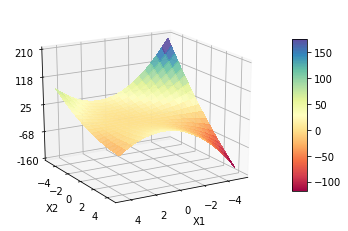

In [281]:
fig = plt.figure()
ax = fig.gca(projection='3d')

#Создаем интервалы для переменных

X1 = np.arange(-5,5,0.5)
X2 = np.arange(-5,5,0.5)
X1, X2 = np.meshgrid(X1, X2)

Y = func(X1, X2)

#Строим поверхность

surf = ax.plot_surface(X1, X2, Y, cmap = cm.Spectral, linewidth=0, antialiased=False, alpha = 0.9)

#Задаем ось Z и параметры подписей

ax.set_zlim(-160, 210.0)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.00f'))

#Настройки цветовой  легенды

fig.colorbar(surf, shrink  = 0.7, aspect = 10)

#Управляем углом под которым смотрим на объект 

ax.azim = 60
ax.dist = 10
ax.elev = 20

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

#### График линий уровня. Общий и для заданных уровней

<a list of 15 text.Text objects>

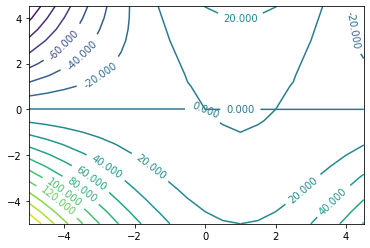

In [282]:
fig, ax = plt.subplots()

#тут задаем число линий уровня
CS = ax.contour(X1, X2, Y, 20)

ax.clabel(CS, inline=True, fontsize = 10)

<a list of 6 text.Text objects>

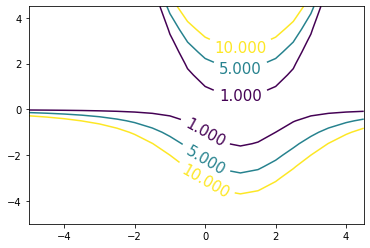

In [283]:
fig, ax = plt.subplots()

#тут задаем три уровня, на которых хотим посмотреть срезы
CS = ax.contour(X1, X2, Y, [1,5,10])

ax.clabel(CS, inline=True, fontsize = 15)